In [2]:
import pennylane as qml
from jax import numpy as np
import jax

In [3]:
dev1 = qml.device("lightning.qubit", wires=1)

@qml.qnode(dev1)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    return qml.expval(qml.PauliZ(0))

params = np.array([0.54, 0.12])
print(circuit(params))

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


0.85154057


59.0990990990991
77.2072072072072


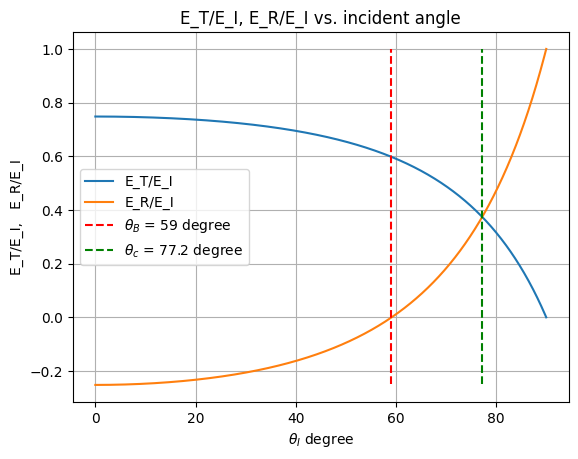

In [39]:
import matplotlib.pyplot as plt
import numpy as np
theta_I = np.linspace(0, np.pi/2, 1000)
n = np.sqrt(2.8)
beta = n
alpha = np.sqrt(1-( np.sin(theta_I)/n)**2)/np.cos(theta_I)
T = 2/(alpha+beta)
R = (alpha-beta)/(alpha+beta)
#Get the angle where the R is 0:
theta_B = 0
for i in range(len(R)):
    if abs(R[i]) < 0.001:
        theta_B = theta_I[i]
        break
print(theta_B*180/np.pi)
#Find the crossover point
theta_c = 0
for i in range(len(T)):
    if abs(T[i]-R[i]) < 0.001:
        theta_c = theta_I[i]
        break

print(theta_c*180/np.pi)
#convert the angle to degree
theta_I = theta_I * 180 / np.pi

plt.plot(theta_I, T, label="E_T/E_I")
plt.plot(theta_I, R, label="E_R/E_I")
plt.vlines(theta_B*180/np.pi, -0.25, 1, colors = "r", linestyles = "dashed", label = r'$\theta_B$' + " = 59 degree")
plt.vlines(theta_c*180/np.pi, -0.25, 1, colors = "g", linestyles = "dashed", label = r'$\theta_c$' + " = 77.2 degree")
plt.xlabel(r'$\theta_I$ degree')
plt.ylabel('E_T/E_I,   E_R/E_I')
plt.title('E_T/E_I, E_R/E_I vs. incident angle')
plt.legend()
plt.grid()
plt.show()


In [7]:
def func1(a):
    return int(a*59-1)
def func2(a):
    return int(a*127+1)
def func3(d):
    return int(3**(d/2))
N = 1000
for a1 in range(1, N):
    for a2 in range(1, N):
        for d in range(1, N):
            if func1(a1) == func2(a2) and func2(a2) == func3(d):
                print(a1, a2, d)
                break
